In [1]:
from google.colab import files
uploaded = files.upload()


Saving Fraud_check.csv to Fraud_check (1).csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [3]:
Fdata = pd.read_csv(r'Fraud_check.csv')

In [4]:
Fdata.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [5]:
Fdata.shape

(600, 6)

In [6]:
Fdata.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
Fdata.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [8]:
Fdata.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [9]:
#transforming Categorical data to Numerical
from sklearn.preprocessing import LabelEncoder

colname=['Undergrad','Marital.Status','Urban']

le=LabelEncoder()

for x in colname:
    Fdata[x]=le.fit_transform(Fdata[x])

In [10]:
Fdata.dtypes

Undergrad          int64
Marital.Status     int64
Taxable.Income     int64
City.Population    int64
Work.Experience    int64
Urban              int64
dtype: object

In [11]:
Fdata.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [12]:
Fdata.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


<Axes: >

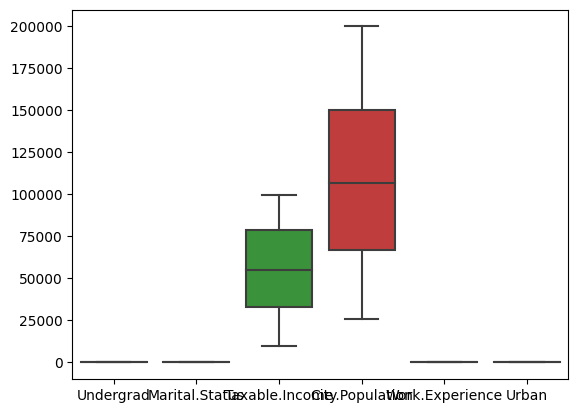

In [13]:
sns.boxplot(Fdata)

<Axes: >

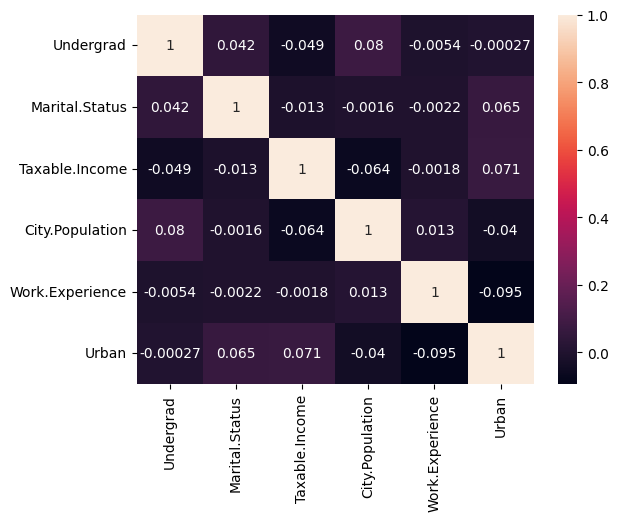

In [14]:
sns.heatmap(Fdata.corr(), annot = True)

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree

In [16]:
Fdata.isnull().sum()


Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [17]:

# Binning the Taxable.Income variable as Risky and Good
Fdata['Taxable.Income'] = pd.cut(Fdata['Taxable.Income'], 
                              bins=[0, 30000, 100000], 
                              labels=['Risky', 'Good'])


In [18]:
# Split the dataset into training and testing datasets
X = Fdata.drop('Taxable.Income', axis=1)
y = Fdata['Taxable.Income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [19]:
# Build the decision tree model
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [20]:
# Make predictions on the test set
y_pred = clf.predict(X_test)


In [21]:
# Evaluate the model using classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

        Good       0.79      0.99      0.88       143
       Risky       0.00      0.00      0.00        37

    accuracy                           0.79       180
   macro avg       0.40      0.50      0.44       180
weighted avg       0.63      0.79      0.70       180

[[142   1]
 [ 37   0]]


[Text(0.4230769230769231, 0.875, 'x[2] <= 60294.5\nentropy = 0.736\nsamples = 420\nvalue = [333, 87]'),
 Text(0.15384615384615385, 0.625, 'x[3] <= 6.5\nentropy = 0.611\nsamples = 93\nvalue = [79, 14]'),
 Text(0.07692307692307693, 0.375, 'entropy = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.23076923076923078, 0.375, 'x[3] <= 24.5\nentropy = 0.679\nsamples = 78\nvalue = [64, 14]'),
 Text(0.15384615384615385, 0.125, 'entropy = 0.796\nsamples = 54\nvalue = [41, 13]'),
 Text(0.3076923076923077, 0.125, 'entropy = 0.25\nsamples = 24\nvalue = [23, 1]'),
 Text(0.6923076923076923, 0.625, 'x[2] <= 64532.5\nentropy = 0.766\nsamples = 327\nvalue = [254, 73]'),
 Text(0.5384615384615384, 0.375, 'x[2] <= 63521.0\nentropy = 0.954\nsamples = 8\nvalue = [3, 5]'),
 Text(0.46153846153846156, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.6153846153846154, 0.125, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8461538461538461, 0.375, 'x[1] <= 0.5\nentropy = 0.747\nsamples = 319\n

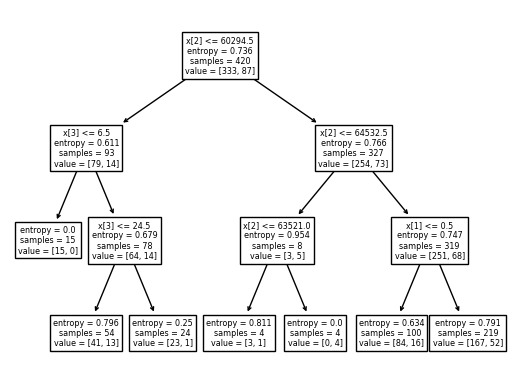

In [22]:
# Visualize the decision tree
tree.plot_tree(clf)

In [29]:
# Building Decision Tree Classifier (CART) using Gini Criteria

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree


In [31]:
# Build the decision tree model
clf = DecisionTreeClassifier(criterion='gini', max_depth=3)
clf.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=3)

In [32]:
# Make predictions on the test set
y_pred = clf.predict(X_test)


In [33]:
# Evaluate the model using classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

        Good       0.79      0.99      0.88       143
       Risky       0.00      0.00      0.00        37

    accuracy                           0.79       180
   macro avg       0.40      0.50      0.44       180
weighted avg       0.63      0.79      0.70       180

[[142   1]
 [ 37   0]]


[Text(0.5, 0.875, 'x[2] <= 60294.5\ngini = 0.328\nsamples = 420\nvalue = [333, 87]'),
 Text(0.25, 0.625, 'x[0] <= 0.5\ngini = 0.256\nsamples = 93\nvalue = [79, 14]'),
 Text(0.125, 0.375, 'x[1] <= 1.5\ngini = 0.153\nsamples = 48\nvalue = [44, 4]'),
 Text(0.0625, 0.125, 'gini = 0.213\nsamples = 33\nvalue = [29, 4]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.375, 0.375, 'x[2] <= 27659.0\ngini = 0.346\nsamples = 45\nvalue = [35, 10]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4375, 0.125, 'gini = 0.325\nsamples = 44\nvalue = [35, 9]'),
 Text(0.75, 0.625, 'x[2] <= 64532.5\ngini = 0.347\nsamples = 327\nvalue = [254, 73]'),
 Text(0.625, 0.375, 'x[2] <= 63521.0\ngini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.5625, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.875, 0.375, 'x[1] <= 0.5\ngini = 0.335\nsamples = 319\nvalue = [251, 68]'),
 Text(0.81

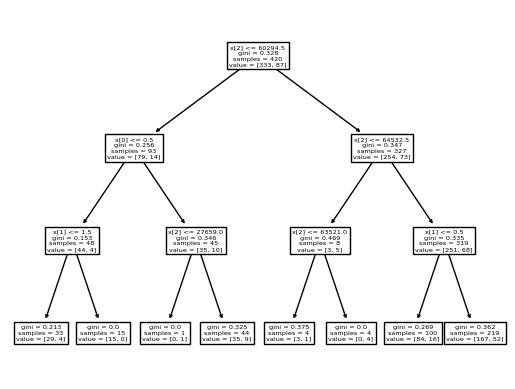

In [34]:
# Visualize the decision tree
tree.plot_tree(clf)